In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("student_data_synthetic_extreme_noisy.csv")

In [3]:
feature_cols = ['Marks 1', 'Marks 2']
X = df[feature_cols] # Features
y = df.Admission # Target variable

In [4]:
#finding whether dataset is imbalanced?
class_counts = df["Admission"].value_counts()
# Print class counts
print(class_counts)

Admission
1    35
0    15
Name: count, dtype: int64


<Axes: xlabel='Marks 1', ylabel='Marks 2'>

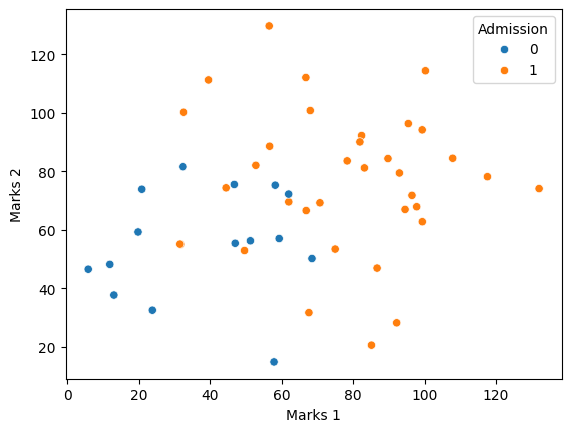

In [5]:
#visualize imbalanced dataset
#x-axis represents values of Marks1
#y-axis represents values of Marks 2
#hue represents the points are colored based on admission   column yes or no 
import seaborn as sns
sns.scatterplot(x=df["Marks 1"], y=df["Marks 2"], hue=df["Admission"])

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)


In [7]:
m1 = LogisticRegression(class_weight='balanced', penalty='l2', solver='lbfgs', max_iter=1000)

# fit the model with data
m1.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
m1.score(X_test,y_test)

0.9230769230769231

In [9]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(m1, X, y, cv=5)
print("Cross-Validation Accuracy:", np.mean(cv_scores))

Cross-Validation Accuracy: 0.78


In [10]:
y_pred=m1.predict(X_test)

In [ ]:
new_pred=m1.predict([[60,70]])

In [12]:
c1 = metrics.confusion_matrix(y_pred, y_test)
print(c1)

print("actual correct matrix")
tp=c1[1][1]
tn=c1[0][0]
fp=c1[0][1]
fn=c1[1][0]
print(np.array([tp,fn,fp,tn]))

[[4 1]
 [0 8]]
actual correct matrix
[8 0 1 4]


In [13]:
#evaluation metrices
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9230769230769231
Precision: 1.0
Recall: 0.8888888888888888


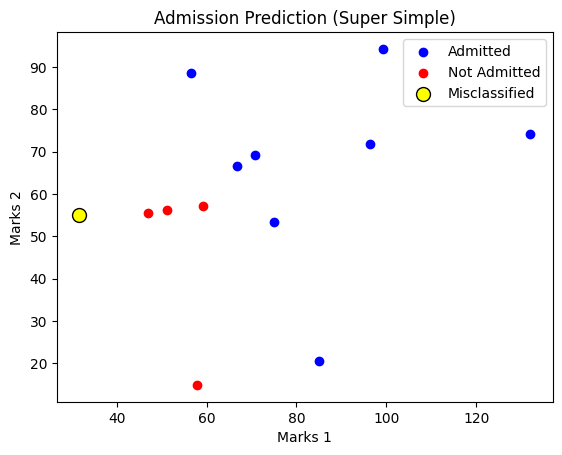

In [14]:
# Plot Admitted students (predicted correctly)
plt.scatter(X_test[y_pred==1]['Marks 1'], X_test[y_pred==1]['Marks 2'], color='blue', label='Admitted')

# Plot Not Admitted students (predicted correctly)
plt.scatter(X_test[y_pred==0]['Marks 1'], X_test[y_pred==0]['Marks 2'], color='red', label='Not Admitted')

# Plot Misclassified points (highlight in yellow)
misclassified = (y_test != y_pred)
plt.scatter(X_test[misclassified]['Marks 1'], X_test[misclassified]['Marks 2'], 
            color='yellow', edgecolor='k', s=100, label='Misclassified')

# Add labels and title
plt.xlabel('Marks 1')
plt.ylabel('Marks 2')
plt.title('Admission Prediction (Super Simple)')

# Add a simple legend
plt.legend()

# Show the plot
plt.show()